# 向量数据的属性和索引

每个 GeoSeries 都可以包含任何几何类型（例如点、线、多边形），并拥有 `GeoSeries.crs` 属性，它存储关于投影（projection）的信息（`crs` 代表坐标参考系（Coordinate Reference System））。因此，`GeoDataFrame` 中的每个 `GeoSeries` 可以在不同的投影中，例如，允许您在不同的 CRS 中拥有相同几何图形的多个版本。

## 创建新属性

最基本的运算之一是创建新属性。举个例子，想看看世界人口以百万为单位。可以从现有的数据列 `pop_est` 开始。从查看列名开始：

In [1]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

然后，可以根据列名进行基本运算。这里创建新列 `m_pop_est`：

In [2]:
world['m_pop_est'] = world['pop_est'] / 1e6
world.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,m_pop_est
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.889953
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",58.005463


## 索引和选择数据

`GeoPandas` 继承了用于索引/选择数据的标准 pandas 方法。这包括使用 `.loc` 的基于标签的索引和使用 `.iloc` 的基于整数位置的索引，它们适用于 `GeoSeries` 和 `GeoDataFrame` 对象。

### 按索引位置选择

Pandas 提供了一套方法，以获得纯基于整数的索引。语义与 Python 和 NumPy 切片密切相关。这些是基于 `0` 的索引。切片时，包含起始边界，而不包含上界。

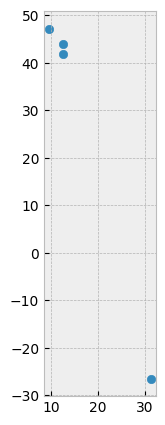

In [9]:
import matplotlib.pyplot as plt
plt.style.use('bmh') # better for plotting geometries vs general plots.

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
northern_world = world.iloc[ 0:4 ]    
northern_world.plot(figsize=(10, 5))  
plt.show()

#### 不同的索引选择

为了支持更明确的基于位置的索引，对象选择有许多用户要求的附加功能。

从具有多轴选择的对象中获取值使用以下表示法（以 `.loc` 为例，但以下表示法也适用于 `.iloc`）。任何轴访问器都可以是空切片 `:`。规格中遗漏的轴被假设为 `:`，例如 `p.loc['a']` 等价于 `p.loc['a'，:，:]`。

### 按位置划分的子集点

除了标准的 pandas 方法之外，GeoPandas 还使用 `cx` 索引器提供基于坐标的索引，`cx` 索引器使用边界框进行切片。`GeoSeries` 或 `GeoDataFrame` 中与边界框相交的几何图形将被返回。

使用 world 数据集，可以使用这个功能，使用 `.cx` 的 `_CoordinateIndexer` 快速选择北半球和南半球的所有城市。`.cx` 允许您快速访问表的几何形状，其中索引反射（reflects）  `[x,y]` 或 `[lon,lat]`。这里将查询纬度 $0$ 度以上和 $0$ 度以下的点：

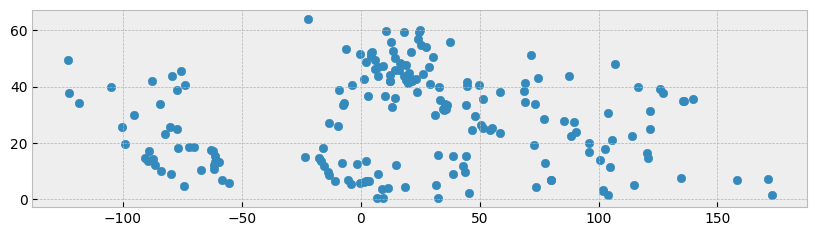

In [10]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
northern_world = world.cx[ : , 0: ]   # subsets all rows above 0 with a slice
northern_world.plot(figsize=(10, 5))
plt.show()

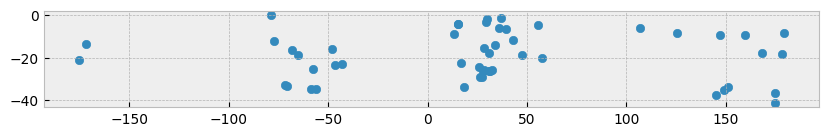

In [11]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
southern_world = world.cx[ : , :0 ]   # subsets all rows below 0  with a slice
southern_world.plot(figsize=(10, 5))
plt.show()